In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from helper_functions.grape_functions import *
from main_grape.Grape_original import Grape
from helper_functions.qutip_open_verification import *

%pylab inline

print parentdir
from IPython import display


Populating the interactive namespace from numpy and matplotlib
/home/mohamed/OQOC/OQOC_Github


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
qubit_num = 4
total_time = qubit_num *2.0
steps = qubit_num * 50

state_transfer = True
#Defining H0
qubit_state_num = 2

#Defining H0
freq_ge = 0#GHz
g = 2*np.pi*0.1 #GHz

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
sigma_z   = np.diag(np.arange(-1,qubit_state_num,2))
I_q = np.identity(qubit_state_num)

g_op = nn_chain_kron(sigma_z, I_q, qubit_num, qubit_state_num)

H0 = g * g_op
    

g = np.zeros(qubit_state_num**qubit_num,dtype=complex)
g[0] = 1

psi0=[0]

all_ones_index = 0
for ii in range (qubit_num):
    all_ones_index = all_ones_index + qubit_state_num**ii

#Defining states to include in the drawing of occupation
states_draw_list = [0,all_ones_index]
states_draw_names = ['00..0','11..1']

#Defining Forbidden sates

target_vec = np.zeros(qubit_state_num**qubit_num,dtype=complex)
target_vec[0]=(1)/np.sqrt(2)
target_vec[all_ones_index]=1/np.sqrt(2)

U = [target_vec]

print np.shape(U)
#Defining U0 (Initial)

Hops = []
Hnames = []
ops_max_amp = []
max_amp=2*np.pi*1
Hops,Hnames,ops_max_amp = append_separate_krons(Q_x,'x',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=max_amp)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_y,'y',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=max_amp)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_y,'z',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=max_amp)

print Hnames
#Defining convergence parameters
max_iterations = 5000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-9,'learning_rate_decay':decay}
reg_coeffs = {'envelope' :0,  'dwdt':0.001,'d2wdt2':0.001*0.0001}
#reg_coeffs = { 'speed_up':100}
#reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses

print len(U)
print np.shape(Hops)

(1, 16)
['xiii', 'ixii', 'iixi', 'iiix', 'yiii', 'iyii', 'iiyi', 'iiiy', 'ziii', 'izii', 'iizi', 'iiiz']
1
(12, 16, 16)


In [3]:

#ge = np.identity(4) + np.outer(g,e) - np.outer(e,e)
T1_ge = 1000.0
#ge=ge*np.sqrt(1/T1_ge) #decay from excited to ground qubit states
c_ops2=[]
c_ops=[]
sm = 0.5* (Q_x + (0-1j)* Q_y) *np.sqrt(1/T1_ge)
print sm
#c_ops.append(sm)
#c_ops.append(ef)
c_ops2,_,_ = append_separate_krons(sm,'sm',qubit_num,qubit_state_num,c_ops2,[],[],amp=max_amp)
c_ops.append(np.kron(sm,I_q))
c_ops.append(np.kron(I_q,sm))

print len(c_ops)
print c_ops[0]
print c_ops2[0]
print np.shape(c_ops)

[[ 0.00000000+0.j  0.03162278+0.j]
 [ 0.00000000+0.j  0.00000000+0.j]]
2
[[ 0.00000000+0.j  0.00000000+0.j  0.03162278+0.j  0.00000000+0.j]
 [ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.03162278+0.j]
 [ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j]
 [ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j]]
[[ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.03162278+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j]
 [ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.03162278+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j]
 [ 0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+0.j
   0.00000000+0.j  0.00000000+0.j  0.00000000+0.j  0.00000000+

In [ ]:
import h5py

with h5py.File('/home/mohamed/Data/01136_Qubit_Pi_open.h5','r') as hf:
    error = np.array(hf.get('error'))
    idx = list(error).index(np.min(error))
        
       
    u0 = np.array(hf.get('uks'))[idx]

u0 = None

#u0 = []
#u0.append(np.ones(steps))
#u0.append(2*np.ones(steps))

#u0 = None

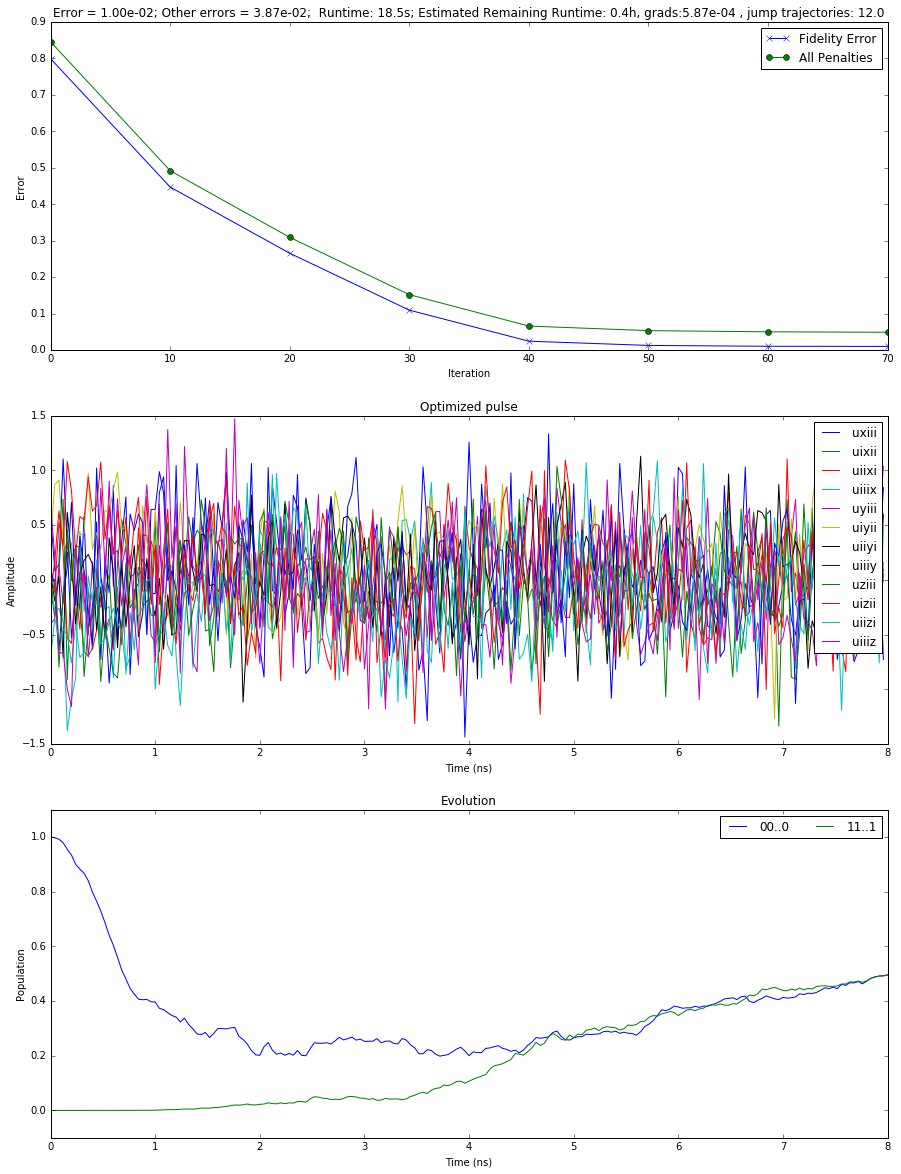

In [ ]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

      
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  
                    
                    show_plots = True, c_ops = c_ops2, initial_guess = u0, use_gpu = False,
       unitary_error = 1e-4,  maxA=ops_max_amp, state_transfer = state_transfer, method ='Adam',
                    reg_coeffs=reg_coeffs, file_name='GHZ', trajectories = 1000, do_all_traj = False,sparse_H=False,sparse_U=False,
                    data_path = '/home/mohamed/Data')

In [ ]:
#1053 9% 1054 no c 1055 13.3%
#1060 no c 
#1079 no c 1082 3.3% 100ns 

In [ ]:
open_qutip_verification('/home/mohamed/Data/00025_GHZ.h5')



In [ ]:
open_qutip_verification('/home/mohamed/Data/01060_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01061_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01062_Qubit_Pi_open.h5')


In [ ]:
open_qutip_verification('/home/mohamed/Data/01079_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01082_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01084_Qubit_Pi_open.h5')

open_qutip_verification('/home/mohamed/Data/01085_Qubit_Pi_open.h5')
